In [1]:
# custom packages
from db.db import DB
from misc.helper_functions import Helper

# nlp packages
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

from gensim import corpora
import gensim

/home/marc/git/topic_modelling/venv/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
# select all data for one search_term from database
search_term = "über uns"
s_sql = "SELECT id, website, extracted_text FROM website_text WHERE search_term = '" + search_term + "'"
index_col = "id"

# get information from database as dataframe
db = DB()
df_texts = db.select(s_sql, index_col)

In [3]:
df_texts.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>website</th>
      <th>extracted_text</th>
    </tr>
    <tr>
      <th>id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>www.klarna.com</td>
      <td>Klarna ist einer der führenden Zahlungsanbiet...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>www.dhl.de</td>
      <td>Grüne Lösungen helfen unseren Kunden, ihre Um...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>www.canon.de</td>
      <td>SpiegelreflexkamerasDSLR Cameras Erkunden Sie...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>www.huk.de</td>
      <td>Wir sind Top Company – überzeugen Sie sich se...</td>
    </tr>
    <tr>
      <th>5</th>
      <td>slack.com</td>
      <td>Wir bei Slack entwickeln eine Plattform, die ...</td>
    </tr>
  </tbody>
</table>
</div>

In [4]:
df_texts.columns

Index(['website', 'extracted_text'], dtype='object')

In [5]:
# extract only texts for topic modelling (lda)
text_raw = df_texts["extracted_text"].to_dict()

In [6]:
print (text_raw[1])

 Klarna ist einer der führenden Zahlungsanbieter in Europa und eine neu lizenzierte Bank, die das Bezahlerlebnis für Käufer und Händler revolutionieren will. Gegründet 2005 in Stockholm, Schweden, gibt Klarna Online-Shoppern die Möglichkeit, per Rechnung, Ratenzahlung oder sofort beim Bestellabschluss per Lastschrift oder Sofortüberweisung zu bezahlen – und bietet dabei ein sicheres und einfaches Checkout-Erlebnis. Im Jahr 2014 hat sich Klarna mit der Sofort GmbH zusammengeschlossen und die Klarna Group geschaffen. Seit 2017 gehört auch der direkte deutsche Wettbewerber BillPay zur Klarna Group.Klarna arbeitet mit rund 89.000 Händlern in Europa und Nordamerika zusammen. Das Unternehmen beschäftigt 1.700 Mitarbeiter und ist in 14 Ländern aktiv.  Copyright © 2005-2018 Klarna Bank AB (publ). Headquarters: Stockholm, Sweden. All rights reserved. Klarna Bank AB (publ). Sveavägen 46, 111 34 Stockholm. Organization number: 556737-0431 Guten Tag!Bitte fülle die folgenden Felder aus. Wir antwor

In [7]:
# Initialize an empty list to hold the clean texts
text_len = len(text_raw)
texts = []
print ("Total Texts: ", text_len)
# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 1, text_len ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    texts.append( Helper.text_to_words( text_raw[i], stop_word_language="de") )
    if ( i%10000 == 0):
        print ("Processed... ", i)


Total Texts:  56


In [9]:
print (texts[0])

klarna führenden zahlungsanbieter europa neu lizenzierte bank bezahlerlebnis käufer händler revolutionieren gegründet stockholm schweden, gibt klarna online-shoppern möglichkeit, per rechnung, ratenzahlung sofort beim bestellabschluss per lastschrift sofortüberweisung bezahlen – bietet dabei sicheres einfaches checkout-erlebnis. jahr 2014 klarna sofort gmbh zusammengeschlossen klarna group geschaffen. seit 2017 gehört direkte deutsche wettbewerber billpay klarna group.klarna arbeitet rund 89.000 händlern europa nordamerika zusammen. unternehmen beschäftigt 1.700 mitarbeiter 14 ländern aktiv. copyright © 2005-2018 klarna bank ab (publ). headquarters: stockholm, sweden. all rights reserved. klarna bank ab (publ). sveavägen 46, 111 34 stockholm. organization number: 556737-0431 guten tag!bitte fülle folgenden felder aus. antworten schnell möglich. bereits kunde?janein informationen umgang daten klarna bank ab (publ) (”klarna”), schweden registrierte firma umsatzsteuer-identifikationsnumme

In [11]:
tokenizer = RegexpTokenizer(r"\w+")
p_stemmer = PorterStemmer()

In [12]:
tokens = [a.split(" ") for a in texts]

In [19]:
flat_tokens = [item for sublist in tokens for item in sublist]

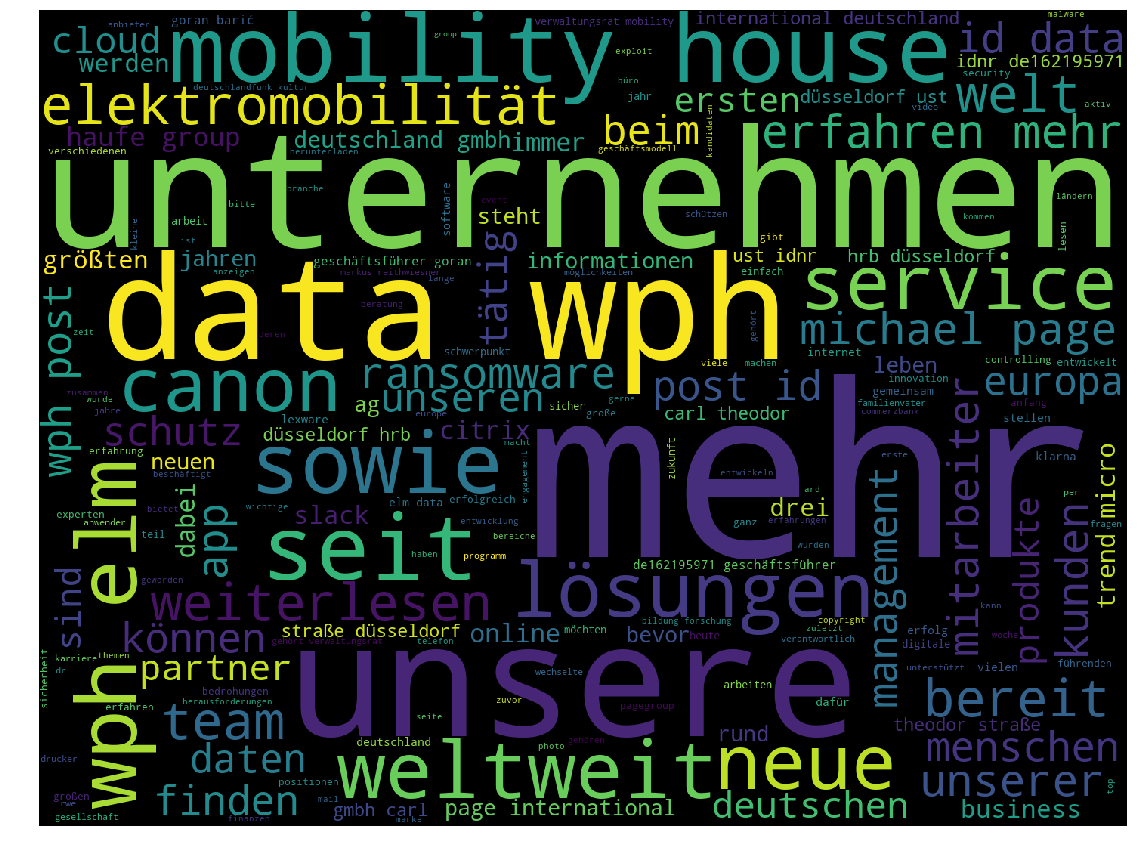

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

cloud = WordCloud(width=1440, height=1080).generate(" ".join(flat_tokens))
                                                   
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.savefig("img/wordcloud.png")

In [21]:
dictionary = corpora.Dictionary(tokens)

In [22]:
corpus = [dictionary.doc2bow(text) for text in tokens]

In [23]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)

In [24]:
print(ldamodel.print_topics(num_topics=20, num_words=4))

[(0, '0.017*"canon" + 0.007*"&" + 0.005*"finden" + 0.005*"photo"'), (1, '0.007*"unsere" + 0.006*"+49" + 0.006*"–" + 0.004*"bitte"'), (2, '0.005*"deutschlandfunk" + 0.004*"7151" + 0.004*"9940" + 0.003*"-"'), (3, '0.012*"|mehr" + 0.008*"citrix" + 0.008*"mehr" + 0.007*"unsere"'), (4, '0.020*"|" + 0.011*"düsseldorf" + 0.009*"mehr" + 0.008*"page"'), (5, '0.011*"commerzbank" + 0.006*"mehr" + 0.003*"technik" + 0.003*"87"'), (6, '0.010*"mobility" + 0.010*"the" + 0.010*"house" + 0.006*"seit"'), (7, '0.011*"weiterlesen" + 0.006*"slack" + 0.005*"-" + 0.005*"bildung"'), (8, '0.007*"vergnügen" + 0.005*"seit" + 0.004*"veranstalten" + 0.004*"pierre"'), (9, '0.009*"daten" + 0.009*"ransomware" + 0.009*"micro" + 0.008*"klarna"')]
